In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv("/content/train.csv")

In [29]:
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [30]:
df.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000
mean,37227.118729,38.565875,15.753901,7302.397983,0.832578,50.007651,1.648075,55.758415
std,21519.150028,12.079673,11.245981,2151.457423,0.994991,28.466459,1.555689,25.411090
min,1.000000,18.000000,1.000000,1316.000000,0.000000,1.000000,0.000000,2.000000
25%,18580.250000,28.000000,7.000000,5658.000000,0.000000,25.000000,0.000000,36.000000
50%,37209.500000,39.000000,13.000000,7354.000000,1.000000,50.000000,1.000000,56.000000
75%,55876.750000,49.000000,23.000000,8880.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000


In [31]:
df.isnull().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Convert categorical variables to numerical
categorical_features = ['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating',
                        'Overtime', 'Education Level', 'Marital Status', 'Job Level', 'Company Size', 'Remote Work',
                        'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation',
                        'Employee Recognition']

onehotencoder = OneHotEncoder()
data_encoded = pd.get_dummies(df, columns=categorical_features)

# Separate features and target
X = data_encoded.drop(columns=['Attrition', 'Employee ID'])
y = data_encoded['Attrition']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [33]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [35]:
# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)


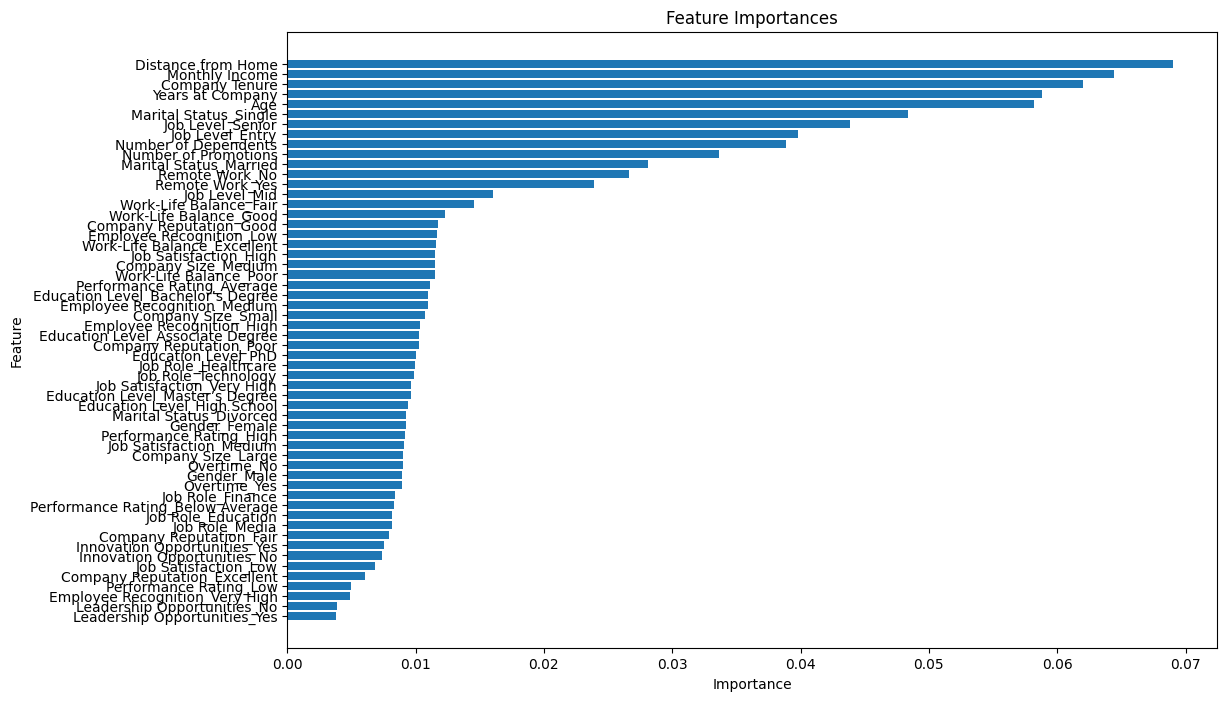

In [37]:
import matplotlib.pyplot as plt

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()


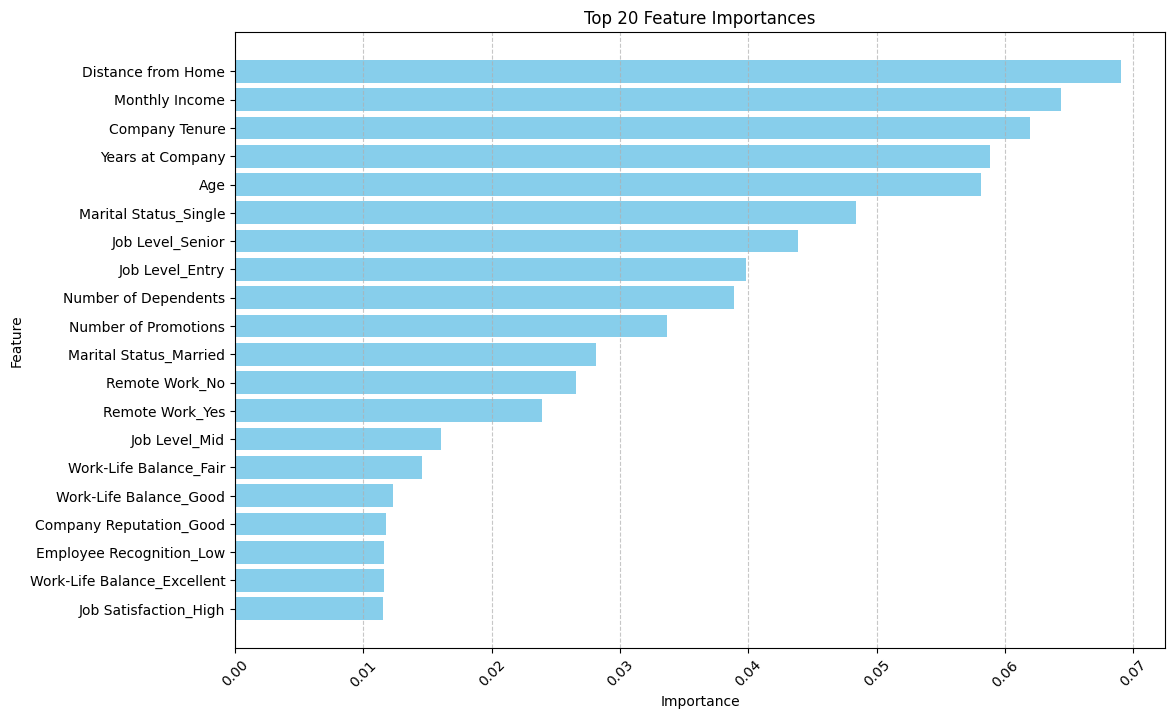

In [38]:
import matplotlib.pyplot as plt

# Get the top 20 most important features
top_n = 20
top_features = feature_importances.head(top_n)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title(f'Top {top_n} Feature Importances')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.xticks(rotation=45)
plt.show()


In [42]:
# Define a threshold
threshold = 0.03

# Select important features
important_features = feature_importances[feature_importances['Importance'] > threshold]['Feature']

# Filter the dataset to include only important features
X_train_filtered = X_train[important_features]
X_test_filtered = X_test[important_features]


In [43]:
# Train a new Random Forest model using only the selected features
model_filtered = RandomForestClassifier(n_estimators=100, random_state=42)
model_filtered.fit(X_train_filtered, y_train)

RandomForestClassifier(random_state=42)

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Check the unique values in the target variable
print(y_train.unique())
print(y_test.unique())

# # Evaluate the model with correct pos_label parameter if labels are not binary
# try:
#     print("Training Set Evaluation:")
#     print(f"Accuracy: {accuracy_score(y_train, y_train_pred)}")
#     print(f"Precision: {precision_score(y_train, y_train_pred, pos_label=1)}")
#     print(f"Recall: {recall_score(y_train, y_train_pred, pos_label=1)}")
#     print(f"F1 Score: {f1_score(y_train, y_train_pred, pos_label=1)}")

#     print("\nTest Set Evaluation:")
#     print(f"Accuracy: {accuracy_score(y_test, y_test_pred)}")
#     print(f"Precision: {precision_score(y_test, y_test_pred, pos_label=1)}")
#     print(f"Recall: {recall_score(y_test, y_test_pred, pos_label=1)}")
#     print(f"F1 Score: {f1_score(y_test, y_test_pred, pos_label=1)}")
# except ValueError as e:
#     print(e)

# If labels are not binary, convert them
if not pd.api.types.is_numeric_dtype(y):
    y = y.apply(lambda x: 1 if x == 'Left' else 0)

    # Split data again with converted labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Retrain the model with the new labels
    model_filtered.fit(X_train_filtered, y_train)

    # Make predictions again
    y_train_pred = model_filtered.predict(X_train_filtered)
    y_test_pred = model_filtered.predict(X_test_filtered)

    # Evaluate the model again
    print("Training Set Evaluation with converted labels:")
    print(f"Accuracy: {accuracy_score(y_train, y_train_pred)}")
    print(f"Precision: {precision_score(y_train, y_train_pred, pos_label=1)}")
    print(f"Recall: {recall_score(y_train, y_train_pred, pos_label=1)}")
    print(f"F1 Score: {f1_score(y_train, y_train_pred, pos_label=1)}")

    print("\nTest Set Evaluation with converted labels:")
    print(f"Accuracy: {accuracy_score(y_test, y_test_pred)}")
    print(f"Precision: {precision_score(y_test, y_test_pred, pos_label=1)}")
    print(f"Recall: {recall_score(y_test, y_test_pred, pos_label=1)}")
    print(f"F1 Score: {f1_score(y_test, y_test_pred, pos_label=1)}")


['Stayed' 'Left']
['Stayed' 'Left']
Training Set Evaluation with converted labels:
Accuracy: 0.999976029531617
Precision: 0.9999495484587054
Recall: 1.0
F1 Score: 0.9999747735929971

Test Set Evaluation with converted labels:
Accuracy: 0.6786353467561521
Precision: 0.667189384800965
Recall: 0.6493308288330594
F1 Score: 0.6581389814374108
